In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
deli = pd.read_csv("D:\Data science\Assignments docs\Simple Linear Regression\delivery_time.csv")
deli

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
deli.shape

(21, 2)

In [6]:
deli.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
# Renaming the columns for convinience

In [8]:
deli = deli.rename(columns = {"Delivery Time" : "Del_time", "Sorting Time" : "Sort_time"})

In [9]:
deli.columns

Index(['Del_time', 'Sort_time'], dtype='object')

In [10]:
# Graphical exploration of data

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

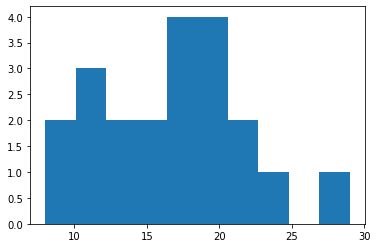

In [11]:
plt.hist(deli.Del_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4da8ae348>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4da8c6a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4da8baf48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4da8c9988>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4da8c9b08>],
 'means': []}

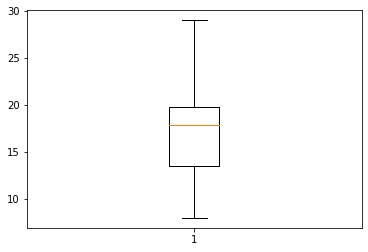

In [12]:
plt.boxplot(deli.Del_time)

In [13]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

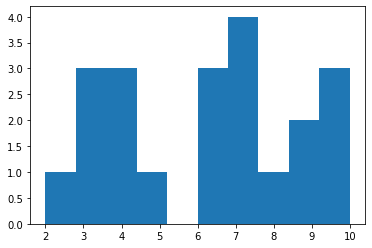

In [14]:
plt.hist(deli.Sort_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4da9b0cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4da9c8cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4da9c2988>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4da9cdc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4da9d0ac8>],
 'means': []}

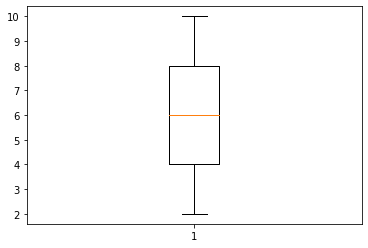

In [15]:
plt.boxplot(deli.Sort_time)

In [16]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards right, hence it is "left skewed" and since the kurtosis < 3, it is "platykurtic".

In [17]:
# Calculation of skewness and kurtosis to check the type of distribution

In [18]:
deli.skew()

Del_time     0.352390
Sort_time    0.047115
dtype: float64

In [19]:
deli.kurt()

Del_time     0.317960
Sort_time   -1.148455
dtype: float64

Text(0, 0.5, 'Delivery time')

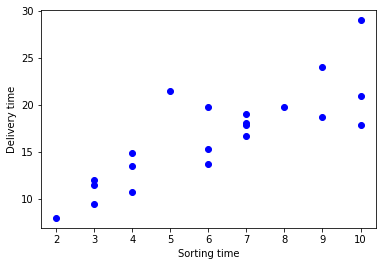

In [20]:
plt.plot(deli.Sort_time, deli.Del_time, "bo"); plt.xlabel("Sorting time"); plt.ylabel("Delivery time")
# plot showing the relation between dependent and independent variables

In [21]:
deli.Del_time.corr(deli.Sort_time)     # checking the correlation between the dependent and independent variables

0.8259972607955326

In [22]:
# For preparing linear regression model importing the statsmodels.formula.api

In [23]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols("Del_time ~ Sort_time", data = deli).fit()

In [25]:
model.params

Intercept    6.582734
Sort_time    1.649020
dtype: float64

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.98e-06
Time:                        22:05:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(model.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
Sort_time  1.108673   2.189367


In [28]:
# Predicting the values using the model

In [29]:
pred = model.predict(deli.Sort_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery time')

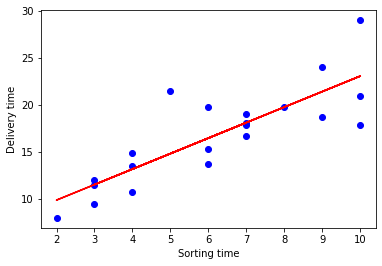

In [30]:
plt.scatter(deli.Sort_time, deli.Del_time, color ="blue"); plt.plot(deli.Sort_time, pred, c="r"); plt.xlabel("Sorting time"); plt.ylabel("Delivery time")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [31]:
pred.corr(deli.Del_time)

0.8259972607955327

In [32]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [33]:
model2 = smf.ols("Del_time ~ np.log(Sort_time)", data = deli).fit()

In [34]:
model2.params

Intercept            1.159684
np.log(Sort_time)    9.043413
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.64e-06
Time:                        22:05:50   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sort_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(model2.conf_int(0.05))

                         0          1
Intercept         -3.97778   6.297147
np.log(Sort_time)  6.16977  11.917057


In [37]:
# Predicting the values using the model

In [38]:
pred2 = model2.predict(deli.Sort_time)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Delivery time')

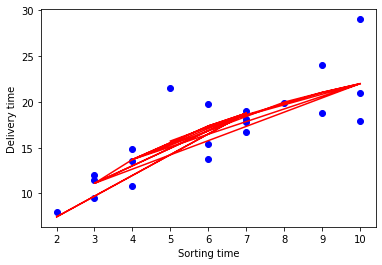

In [39]:
plt.scatter(deli.Sort_time, deli.Del_time, c="b"); plt.plot(deli.Sort_time, pred2, c="r");plt.xlabel("Sorting time"); plt.ylabel("Delivery time")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [40]:
pred2.corr(deli.Del_time)

0.8339325279256244

In [41]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [42]:
model3 = smf.ols("np.log(Del_time) ~ Sort_time", data = deli).fit()

In [43]:
model3.params

Intercept    2.121372
Sort_time    0.105552
dtype: float64

In [44]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.59e-06
Time:                        22:05:51   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sort_time      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(model3.conf_int(0.05))

                  0         1
Intercept  1.905848  2.336896
Sort_time  0.073235  0.137869


In [46]:
# Predicting the values using the model

In [47]:
pred_log = model3.predict(deli.Sort_time)
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [48]:
pred3= np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'Delivery time')

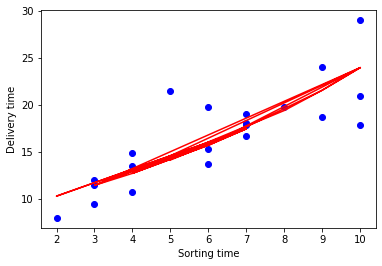

In [49]:
plt.scatter(deli.Sort_time, deli.Del_time, c="b"); plt.plot(deli.Sort_time, pred3, c="r"); plt.xlabel("Sorting time"); plt.ylabel("Delivery time")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [50]:
pred3.corr(deli.Del_time)

0.8085780108289262

In [51]:
deli["Sort_time_sq"] = deli.Sort_time*deli.Sort_time

In [52]:
# bulinding another model(quadratic) to check whether the R_square value can be increased

In [53]:
model4 = smf.ols("np.log(Del_time)~Sort_time+ Sort_time_sq", data =deli).fit()

In [54]:
model4.params

Intercept       1.699704
Sort_time       0.265922
Sort_time_sq   -0.012841
dtype: float64

In [55]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.20e-06
Time:                        22:05:52   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
Sort_time        0.2659      0.080      3.315      0.004       0.097       0.434
Sort_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(model4.conf_int(0.05))

                     0         1
Intercept     1.219786  2.179623
Sort_time     0.097381  0.434462
Sort_time_sq -0.026119  0.000438


In [57]:
# Predicting the values using the model

In [58]:
pred_quad = model4.predict(deli)
pred_quad

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [59]:
pred4 = np.exp(pred_quad)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

Text(0, 0.5, 'Delivery time')

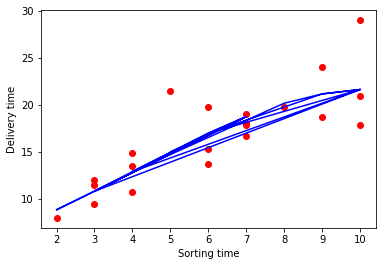

In [60]:
plt.scatter(deli.Sort_time, deli.Del_time, c="r"); plt.plot(deli.Sort_time, pred4, c="b");plt.xlabel("Sorting time");plt.ylabel("Delivery time")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [61]:
pred4.corr(deli.Del_time)

0.825888274991093

In [62]:
# Creating the table of models and thier R_square values

In [63]:
data = {"Model":pd.Series(["model1_linear","model2_exponential","model3_exponential","model4_quadratic"]),"R_square_values":(0.682,0.695,0.711,0.765)}

In [64]:
table_rsquare = pd.DataFrame(data)
table_rsquare

,Model,R_square_values
0,model1_linear,0.682
1,model2_exponential,0.695
2,model3_exponential,0.711
3,model4_quadratic,0.765


In [65]:
# Out of all the 4 models, last model (quadratic_model) has the highest R-square value, hence it is the best fit model

In [66]:
student_resid = model4.resid_pearson     # Calculating the standard residuals of the best model

In [67]:
student_resid

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

Text(0, 0.5, 'Standard residuals')

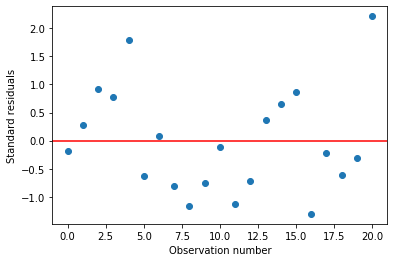

In [68]:
plt.plot(student_resid, "o"); plt.axhline(y=0, color="red");plt.xlabel("Observation number");plt.ylabel("Standard residuals")
# plot showing the standard residuals v/s observed values

Text(0, 0.5, 'Actual')

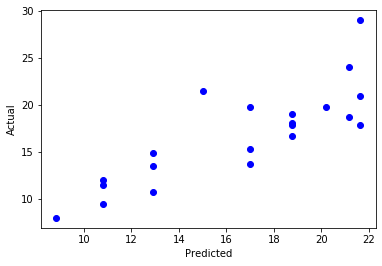

In [69]:
plt.scatter(pred4, deli.Del_time, c="b");plt.xlabel("Predicted");plt.ylabel("Actual")
# plot showing the relation between the actual and predicted values of best fit model

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <a list of 10 Patch objects>)

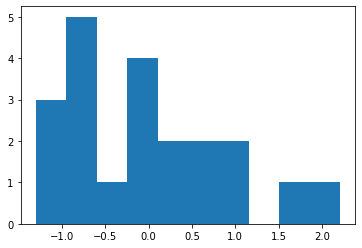

In [70]:
plt.hist(student_resid)       # histogram of standard residuals